In [12]:
#First project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px

%matplotlib inline



In [13]:
ds = pd.read_csv("ds_salaries.csv", index_col=0)
ds.head()

#describe data
ds.describe(include='all')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,607.000000,607,607,607,6.070000e+02,607,607.000000,607,607.00000,607,607
unique,NaN,4,4,50,NaN,17,NaN,57,NaN,50,3
top,NaN,SE,FT,Data Scientist,NaN,USD,NaN,US,NaN,US,M
freq,NaN,280,588,143,NaN,398,NaN,332,NaN,355,326
mean,2021.405272,NaN,NaN,NaN,3.240001e+05,NaN,112297.869852,NaN,70.92257,NaN,NaN
std,0.692133,NaN,NaN,NaN,1.544357e+06,NaN,70957.259411,NaN,40.70913,NaN,NaN
min,2020.000000,NaN,NaN,NaN,4.000000e+03,NaN,2859.000000,NaN,0.00000,NaN,NaN
25%,2021.000000,NaN,NaN,NaN,7.000000e+04,NaN,62726.000000,NaN,50.00000,NaN,NaN
50%,2022.000000,NaN,NaN,NaN,1.150000e+05,NaN,101570.000000,NaN,100.00000,NaN,NaN
75%,2022.000000,NaN,NaN,NaN,1.650000e+05,NaN,150000.000000,NaN,100.00000,NaN,NaN


There are 607 records in this dataset
Experience level: senior (SE) is the most common value in this dataset, with 280 records
More than 95% work Full Time
23% of records is Data Scientist
More than half of records is US residence
Mean salary (USD) is 112297 dollar, maximum is 600k and min is 2859$

In [14]:
#Count employment type
print(ds['employment_type'].value_counts())

# Count levels records
print(ds['experience_level'].value_counts())

# Unique job Title
print(ds['job_title'].value_counts())

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64
SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer             

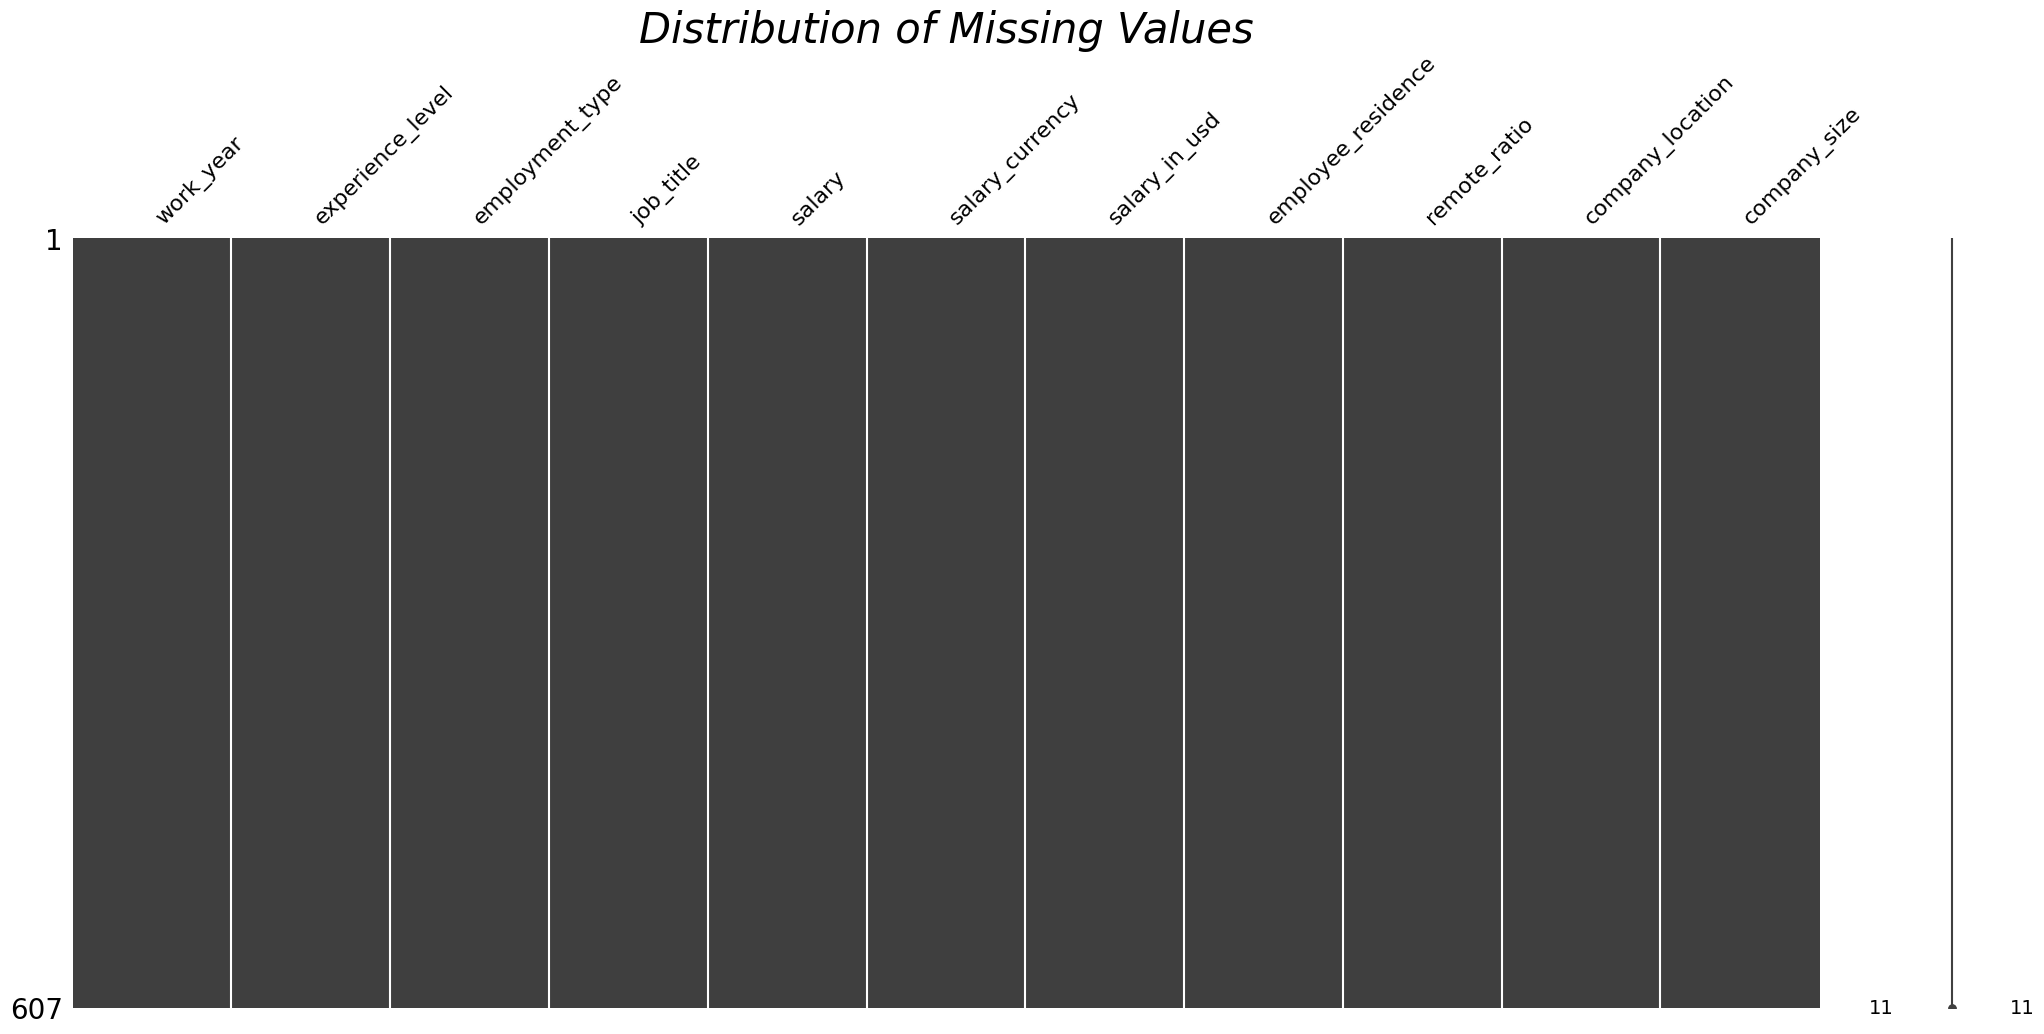

In [15]:
msno.matrix(ds)
plt.title('Distribution of Missing Values',fontsize=30, fontstyle= 'oblique')
plt.show()

In [48]:
fig = px.pie(ds, names='work_year',
             title='Proportion of Working Year')
            #  color_discrete_sequence=px.colors.sequential.Turbo)

fig.show()

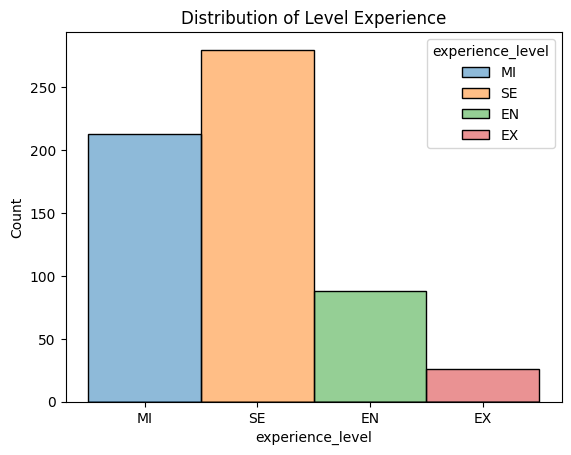

In [41]:
#Distribution of Experience Level
sns.histplot(ds, x='experience_level', hue='experience_level')
plt.title("Distribution of Experience Level")
plt.show()


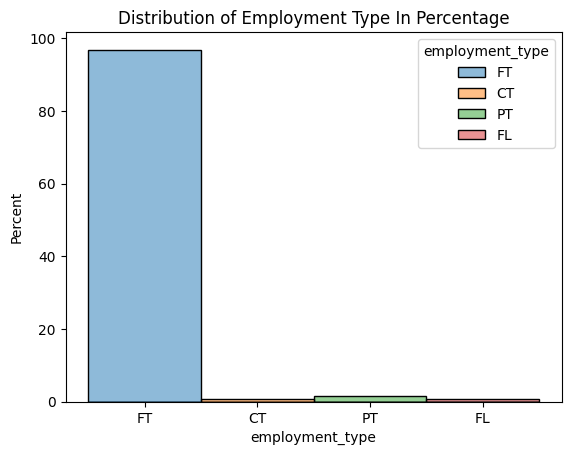

In [51]:
# Distribution of Employment Type
sns.histplot(ds, x='employment_type', hue='employment_type', stat='percent')
plt.title("Distribution of Employment Type In Percentage")
plt.show()

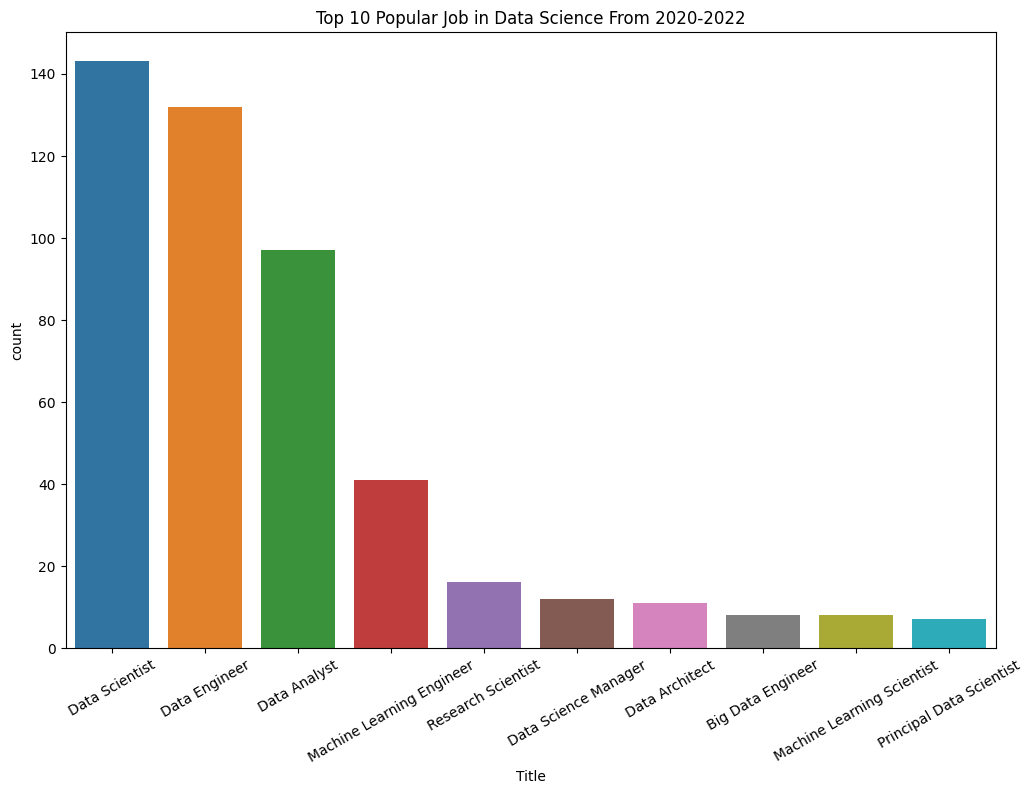

In [19]:
#Job title
job = ds['job_title'].value_counts().rename_axis("job_title").to_frame("count").reset_index()
top_10_popular_jobs = job.nlargest(n=10, columns='count')
top_10_unpopular_jobs = job.nsmallest(n=10, columns='count')

#Plot top 10 popular
plt.figure(figsize=(12,8))
ax = sns.barplot(data = top_10_popular_jobs, x='job_title', y='count')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
ax.set_xlabel("Title")
ax.set_title("Top 10 Popular Job in Data Science From 2020-2022")
plt.show()

In [20]:
#Top job in each year
jobs_each_year = ds.groupby("work_year")['job_title'].value_counts().to_frame("count").reset_index(level=1)


def top5_year(year=int(),df=jobs_each_year):
    return df.loc[year].nlargest(n=5, columns='count')

top5_job = [top5_year(2020),top5_year(2021),top5_year(2022)]




/var/folders/1n/35j_zz2x1hn030g8mc0vzm5h0000gn/T/ipykernel_853/239205965.py:8: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/1n/35j_zz2x1hn030g8mc0vzm5h0000gn/T/ipykernel_853/239205965.py:8: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/1n/35j_zz2x1hn030g8mc0vzm5h0000gn/T/ipykernel_853/239205965.py:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



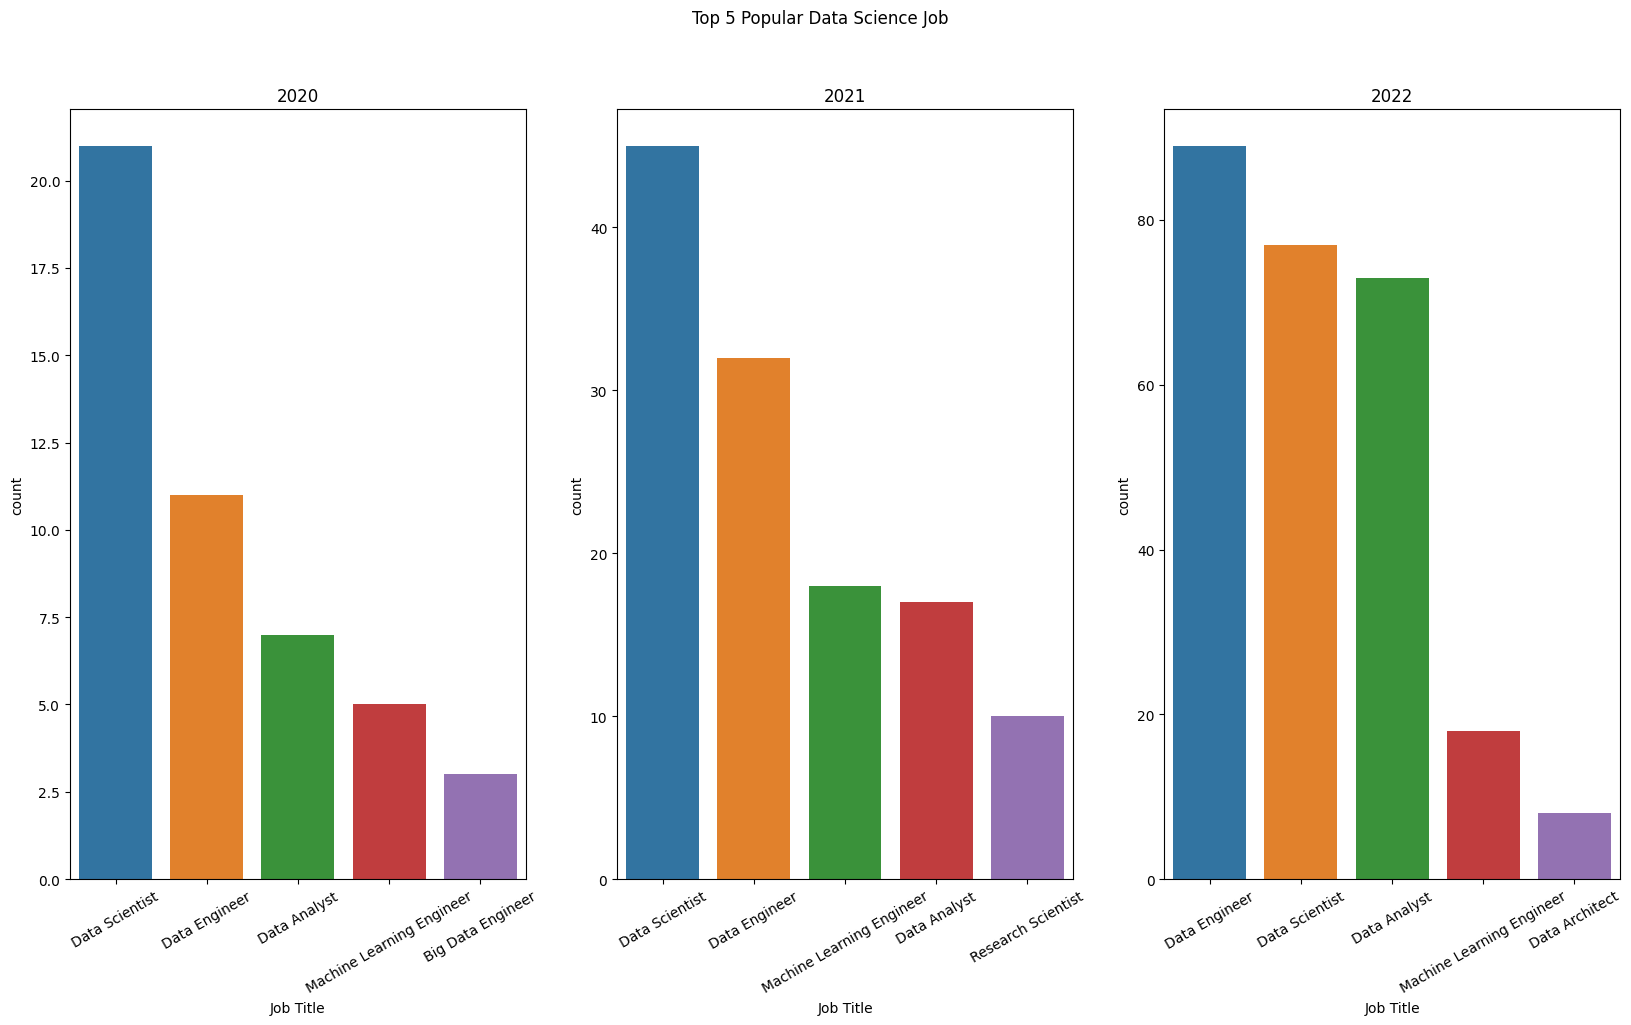

In [23]:
# draw top 5 each year
fig, axes = plt.subplots(1,3,figsize =(20,10))
fig.suptitle("Top 5 Popular Data Science Job")
years = ["2020","2021","2022"]

for i in range(3):  
    # set job title in top 5 for each year
    axes[i].set_xticklabels(axes[i].get_xticklabels(),rotation = 30) 
    
    #set years
    axes[i].set_title(years[i])
    #Plot data
    sns.barplot(ax = axes[i],data=top5_job[i], x='job_title', y='count')
    axes[i].set_xlabel("Job Title")
plt.show()


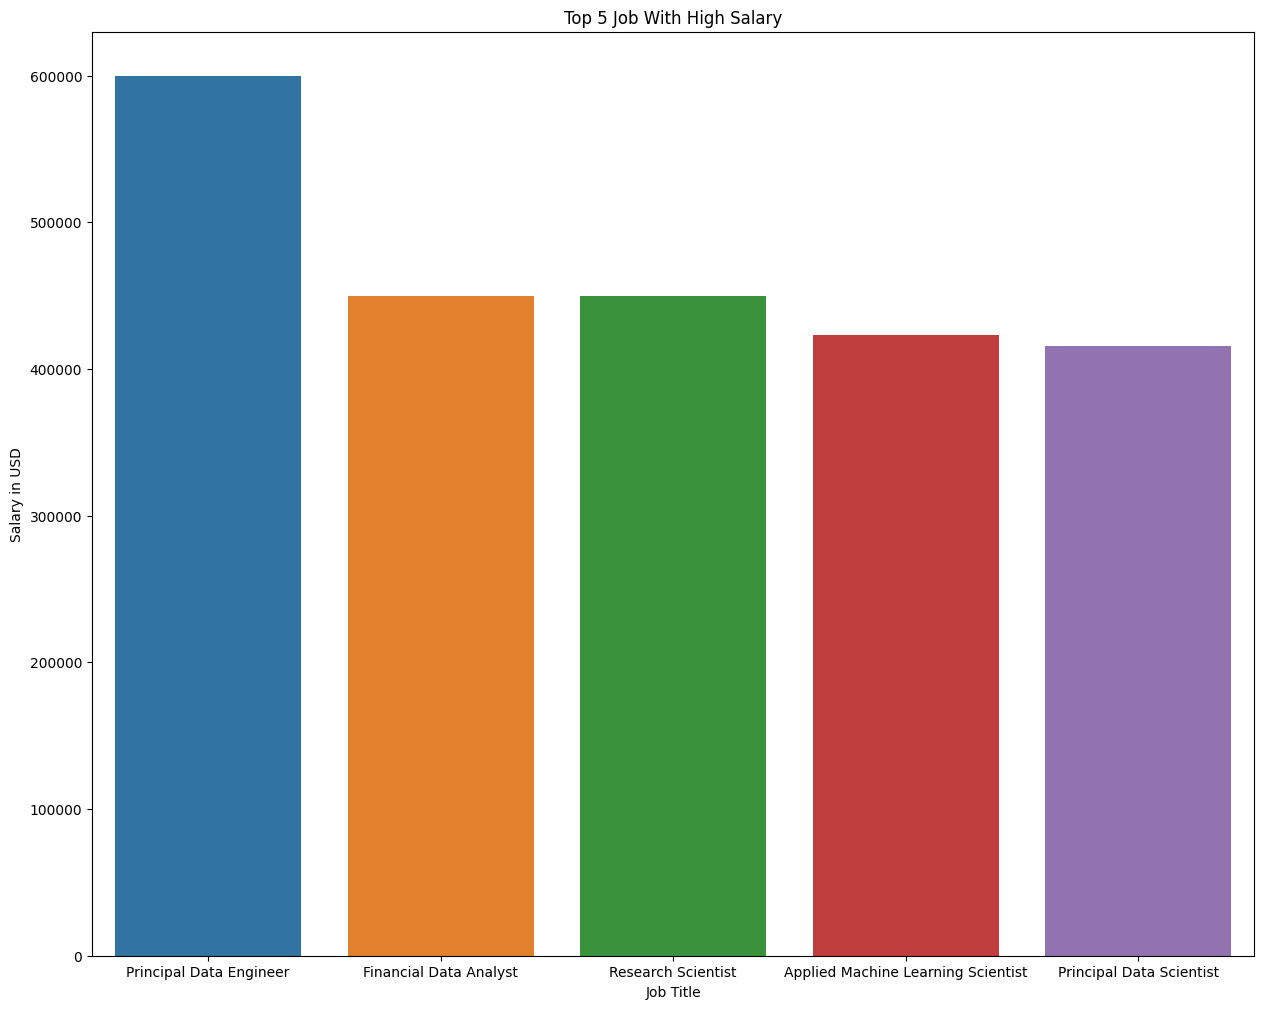

In [74]:
salary = ds[['job_title','salary_in_usd']].sort_values("salary_in_usd", ascending=False)
top_5_job_salary = salary.nlargest(n=5, columns='salary_in_usd')
top_5_job_salary

fig = plt.figure(figsize=(15,12))
ax = sns.barplot(data = top_5_job_salary, x='job_title', y='salary_in_usd')
ax.set_xlabel("Job Title")
ax.set_ylabel("Salary in USD")
ax.set_title("Top 5 Job With High Salary")
plt.show()

In [88]:
# Analyze average salary of DA, DE and DS in each level

def get_job_salary_by_experience(experience_level):
    return ds[(ds['experience_level'] == experience_level)][['experience_level','job_title','salary_in_usd']]

entry = get_job_salary_by_experience("EN")
intermediate = get_job_salary_by_experience("MI")
senior = get_job_salary_by_experience("SE")
expert = get_job_salary_by_experience("EX")


,experience_level,job_title,salary_in_usd
25,EX,Director of Data Science,325000
41,EX,Data Engineering Manager,79833
73,EX,BI Data Analyst,150000
74,EX,Head of Data,235000
84,EX,Director of Data Science,153667
160,EX,Head of Data,230000
161,EX,Head of Data Science,85000
164,EX,Director of Data Science,130026
167,EX,Director of Data Science,250000
187,EX,Data Science Consultant,69741
